In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## gensim 패키지를 사용한 Word2Vec 

### 주요 코드
- 패키지 임포트
    - import gensim
    - from gensim.models import Word2Vec


- 모델 파라메타 설정
    - model = Word2Vec(sentences, size=100, window=5, min_count=5)
        - size: 차원의 수
        - window: 주변 단어 범위
        - min_count: 최소 빈도
        - sg = 1 --> Skip-gram
        - sg= 0 --> CBOW (default)

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 718 kB/s 
     |████████████████████████████████| 453 kB 76.9 MB/s 


In [2]:
import pandas as pd
import re

In [3]:
from konlpy.tag import Komoran
tagger = Komoran()

In [5]:
!pip install ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.9 MB/s 


In [ ]:
# 워드 임베딩

import ujson
import gensim
from gensim.models import Word2Vec



def main():
    
    sentences = read_documents()
# Word2Vec------------------------------------------------------------------------
    model = Word2Vec(sentences, size=100, window=5, min_count=5) # Word2Vec
# -------------------------------------------------------------------------   
    utilize(model)

    save_reuse(model)
    

def read_documents():
  df = pd.read_csv('/content/인공지능youtube댓글.csv', sep=',', encoding='utf-8', engine='python')
  
  text_sentences = []
  for post in df:
      text_sentences.extend(re.split('; |\?|\!|\ㅋ|\ㄷ|\ㅠ', post))
  text_sentencesss = []

  for sentence in text_sentences:
    if sentence == '' or sentence == ' ' or sentence == '  ':
      continue
    else:
      text_sentencesss.append(sentence)

  text_sentences = text_sentencesss
  text_sentences_nouns = []
  for sentence in text_sentences:
      sentence_nouns = tagger.nouns(sentence)
      text_sentences_nouns.append(sentence_nouns)

  return text_sentences_nouns

def utilize(model):
    
    word_vectors = model.wv
    
    print(word_vectors.vocab.keys()) # 단어리스트

    print(word_vectors.index2word[:]) # 빈도순의 단어리스트
    
    print(word_vectors["인간"]) # 단어의 100차원의 실제 벡터값
    
    print(word_vectors.similarity("인간", "로봇")) # 
    
    print(word_vectors.n_similarity(["인간", "로봇"], ["인류", "우리"]))
    
    print(word_vectors.similar_by_word("인간", topn = 5)) # 유사한 단어 5개, topn의 기본값은10
    
    print(word_vectors.most_similar(positive=["인간"], negative=["로봇"], topn=5))
    
    print(word_vectors.most_similar(positive=["발전","기술"], negative=["개발"]))
    

def save_reuse(model):
    
    from gensim.models.keyedvectors import KeyedVectors
    
    model_file_name = "/content/AI_dip.model"
    model.save(model_file_name)                                   # 모델 저장

    model2 = Word2Vec.load(model_file_name)
    word_vectors2 = model2.wv
    print(word_vectors2["로봇"])
    
    
    word_vector_file_name = "/content/AI_dip.wv"
    word_vectors2.save(word_vector_file_name)                     # 벡터 저장                  
    
    word_vectors3 = KeyedVectors.load(word_vector_file_name)
    print(word_vectors3["로봇"])
   

main()

# 네트워크 시각화

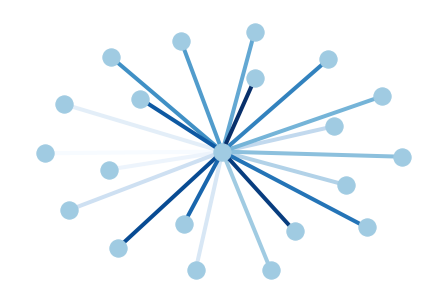

In [ ]:
# 네트워크 샘플
import matplotlib.pyplot as plt
import networkx as nx

G = nx.star_graph(20)
pos = nx.spring_layout(G, seed=63)  # Seed layout for reproducibility
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

In [6]:
# 코랩에서 한글깨질 경우 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행후 런타임/런타임 다시 시작 을 클릭

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,798 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
pip install ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.7 MB/s 


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.8 MB/s 
     |████████████████████████████████| 453 kB 22.5 MB/s 


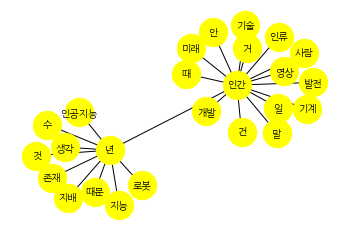

In [4]:
# 워드 임베딩을 통한 유의어 네트워크 도출


import sys
import ujson
from gensim.models import Word2Vec
from itertools import combinations
import networkx as nx  #네트워크화 
import matplotlib.pyplot as plt # 그래프

NUM_TOP_WORDS = 25


def main():
    """문서 집합에 단어 임베딩을 수행하여 어휘 유사도 네트워크를 시각화한다."""
  
    sentences = read_sentences()
    
    model = Word2Vec(sentences, size=100, window=5, min_count=5) # Word2Vec
    word_vectors = model.wv
    
    word_sim_net = build_word_sim_network(word_vectors)       # 네트워크 생성
    draw_network(word_sim_net)           # 네트워크 그리기
    

def read_sentences():
  df = pd.read_csv('/content/인공지능youtube댓글.csv', sep=',', encoding='utf-8', engine='python')
  
  text_sentences = []
  for post in df:
      text_sentences.extend(re.split('; |\?|\!|\ㅋ|\ㄷ|\ㅠ', post))
  text_sentencesss = []

  for sentence in text_sentences:
    if sentence == '' or sentence == ' ' or sentence == '  ':
      continue
    else:
      text_sentencesss.append(sentence)

  text_sentences = text_sentencesss
  text_sentences_nouns = []
  for sentence in text_sentences:
      sentence_nouns = tagger.nouns(sentence)
      text_sentences_nouns.append(sentence_nouns)

  return text_sentences_nouns
    


def build_word_sim_network(word_vectors):
    """주어진 어휘 벡터로부터 어휘 유사도 네트워크를 생성하여 돌려준다."""
    G = nx.Graph()
    freq_words = [word_vectors.index2word[i] for i in range(NUM_TOP_WORDS)]
    for word_i, word_j in combinations(freq_words, 2):
        sim = word_vectors.similarity(word_i, word_j)
        G.add_edge(word_i, word_j, weight=sim)
        
    T = nx.minimum_spanning_tree(G)

    return T   


def draw_network(G):
    """어휘 유사도 네트워크를 화면에 표시한다."""
    
    font_name = "NanumGothic"
    nx.draw_networkx(G, \
            pos=nx.spring_layout(G, k=0.2, scale=2), \
            node_size=800, \
            node_color="yellow", \
            font_family=font_name, \
            #label_pos=0.0,  \
            with_labels=True, \
            font_size=10)

    plt.axis("off")
    plt.show()
   

main()

#### 주요 코드
- 패키지 임포트
    - from gensim.models import doc2vec
    - from gensim.models.doc2vec import TaggedDocument


- 문서에 태그 부여
    - tagged_documents = read_tagged_documents(input_file_name)
    - 예) tagged_documents[0] = ( words=[‘뜻’, ‘깊다‘, ….., ‘감사‘] ,tags = [‘NMH_SPEECH_29’] )  
    


In [ ]:
# 문서 임베딩

import ujson
import numpy as np
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument

FEATURE_POSES = ["NNG", "NNP", "MM", "MAG", "MAJ", "VV", "VA"]
PRED_POSES = ["VV", "VA"]
MA_KEY = "body_ma"

def main():
    
    input_file_name = "/content/dataset/nmh_speeches.txt"
    
    tagged_documents = read_tagged_documents(input_file_name)
   
    doc_vects = generate_d2v(tagged_documents)
    
    use_d2v(doc_vects)
    
def read_tagged_documents(input_file_name):
        
    tagged_documents = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for i, line in enumerate(input_file):
            json_obj = ujson.loads(line)
            
            if json_obj["field"] != "외교/통상":
                    continue

            morphs = []
            
            for sent_anal in json_obj[MA_KEY]:
                for morph_lex, morph_cat in sent_anal:
                    if morph_cat not in FEATURE_POSES:
                        continue
                        
                    if morph_cat in PRED_POSES:
                        morph_lex += "다"
                        
                    morphs.append(morph_lex)
            
            tag = "NMH_SPEECH_" + str(i)                          # 태그 생성
            tagged_document = TaggedDocument(morphs, [tag])       # 복수 개의 태그를 부여할 수 있지만, 여기서는 하나만 부여
            tagged_documents.append(tagged_document)

    return tagged_documents

def generate_d2v(tagged_documents):
    
    model = doc2vec.Doc2Vec(tagged_documents, vector_size=100, min_count=5)
      
    doc_vects = model.docvecs

    return doc_vects


def use_d2v(doc_vects):
    
    print(doc_vects["NMH_SPEECH_29"][:10])
    print(doc_vects.most_similar("NMH_SPEECH_29", topn=3))   
   
main()
# 문서29번의 벡터중 10개만 추출
#유사한 문서 3개만 추출 : 511번, 111번, 357번 문서

[-0.07712812  0.16475226  0.04538668  0.29778087  0.01988011 -0.02420287
 -0.07815574  0.09004601  0.17611574 -0.05438296]
[('NMH_SPEECH_357', 0.9996702671051025), ('NMH_SPEECH_599', 0.9996487498283386), ('NMH_SPEECH_511', 0.9996479749679565)]
